In [16]:
import opendatasets as od

In [17]:
od.download("https://www.kaggle.com/datasets/gti-upm/leapgestrecog")

Skipping, found downloaded files in ".\leapgestrecog" (use force=True to force download)


In [18]:
import os
from os import listdir
import numpy as np
from numpy import asarray
from PIL import Image
from skimage import io, transform
import matplotlib.pyplot as plt

arr_x = []
arr_y = []

ogfolder = os.listdir("leapGestRecog")
ogfolder = np.delete(ogfolder, -1)
for folder_person in ogfolder:
    label = 0
    folder_person = "leapGestRecog/" + folder_person
    for folder in os.listdir(folder_person):
        folder = folder_person + "/" + folder
        folder_images = os.listdir(folder)
        if(folder_images[0] == '.ipynb_checkpoints'):
            folder_images = np.delete(folder_images, 0)
        for image in folder_images:
            im = io.imread(folder + "/" + image)
            im = im.reshape(240, 640, 1)
            im = transform.resize(im, (32, 85, 1))
            arr_x.append(asarray(im))
            arr_y.append([label])
        label +=1
        
X = np.array(arr_x) 
Y = np.array(arr_y)

In [19]:
Y

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 32)


In [21]:
#Create the Convolutional Base 
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 85, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 83, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 41, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 39, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 19, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 17, 64)         36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))



In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 83, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 41, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 39, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 19, 64)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 17, 64)         36928     
                                                                 
 flatten_2 (Flatten)         (None, 4352)             

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

Epoch 1/10
438/438 [==============================] - 42s 88ms/step - loss: 0.3420 - accuracy: 0.8890 - val_loss: 0.0130 - val_accuracy: 0.9975
Epoch 2/10
438/438 [==============================] - 37s 84ms/step - loss: 0.0188 - accuracy: 0.9946 - val_loss: 0.0142 - val_accuracy: 0.9960
Epoch 3/10
438/438 [==============================] - 36s 82ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 0.0267 - val_accuracy: 0.9938
Epoch 4/10
438/438 [==============================] - 35s 81ms/step - loss: 0.0135 - accuracy: 0.9964 - val_loss: 0.0151 - val_accuracy: 0.9955
Epoch 5/10
438/438 [==============================] - 36s 83ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 6/10
438/438 [==============================] - 33s 76ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0012 - val_accuracy: 0.9998
Epoch 7/10
438/438 [==============================] - 35s 79ms/step - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.0015 - val_accuracy:

188/188 - 5s - loss: 0.0017 - accuracy: 0.9997 - 5s/epoch - 26ms/step


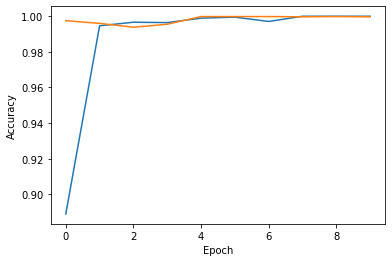

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

In [29]:
print(test_acc)

0.999666690826416
